# 多個子圖

子圖功能用來並排比較不同的資料圖，以提高説明力。 Matplotlib子圖有四種方式可以在單個圖中一起存在的較小軸組子圖，這些子圖可能是插圖，圖形網格或其他更複雜的佈局。 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## ``plt.axes``: 手繪子圖

創建軸的最基本方法是使用``plt.axes``函數。預設情況下，這會創建一個填充整個圖形的標準軸物件。
``plt.axes``也有可選參數，它是圖坐標系中四個數字的串列。這些數字代表圖形坐標系中的“左，底，寬，高”``，其範圍從圖的左下角的0到圖的右上角的1。

例如，我們可以通過將* x *和* y *位置設置為0.65（也就是說，從寬度的65％和高度的65％開始）在另一個軸的右上角創建一個插入軸與圖）和* x *和* y *範圍為0.2（即軸的大小是寬度的20％和圖的高度的20％）：


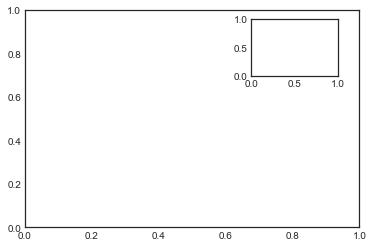

In [2]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

在物件導向的介面中，這個命令的等價指令是``fig.add_axes（）``。 下面的例子，即以此創建兩個垂直堆疊的軸：

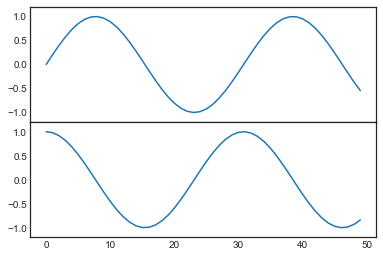

In [3]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

## ``plt.subplot``: 子圖的簡單網格

這是對齊列或行的子圖，利用``plt.subplot（）``，在網格中創建一個子圖。
採用三個整數參數，列數、行數和要在此創建的繪圖的索引，從左上角到右下角：


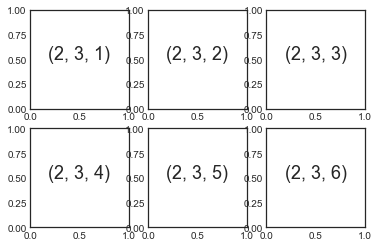

In [4]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

命令``plt.subplots_adjust``可用於調整這些圖之間的間距。
下面的代碼使用等效的物件導向命令``fig.add_subplot（）``：

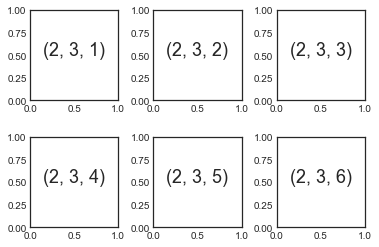

In [5]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

上面例子中也用了``plt.subplots_adjust``的``hspace``和``wspace``參數，它們以子圖大小為單位指定沿圖的高度和寬度的間距。如上圖， 間距是子圖寬度和高度的40％。

## ``plt.subplots``: 整體網格一氣呵成

在創建大型子圖網格時，建議使用``plt.subplots（）``（注意``subplots``末尾的``s``）。 該函數不是創建單個子圖，而是在一行中創建完整的子圖網格，並將它們返回到NumPy陣列中。其參數是列數和行數，以及可選關鍵字``sharex``和``sharey``，允許您定不同軸之間的關係。

下面的例子創建$ 2*3 $子圖的網格，其中同一行中的所有軸共用其y軸刻度，並且同一列中的所有軸共用其x軸刻度：


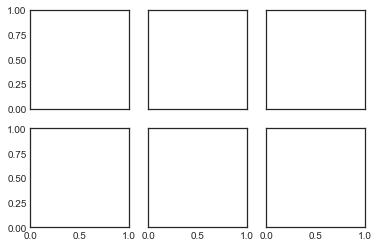

In [6]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

通過指定``sharex``和``sharey``，可以自動刪除網格上的內部標籤以使繪圖更清晰。
生成的軸實例網格在NumPy陣列中返回，允許使用標準陣列索引標記法方便地指定所需的軸：

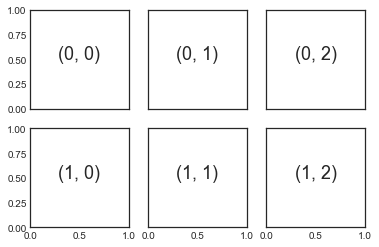

In [7]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

## ``plt.GridSpec``: 更複雜的安排

要超越常規網格到跨越多行和列的子圖，可以使用``plt.GridSpec（）``。
``plt.GridSpec（）``物件本身不會創建一個圖; 它只是一個方便的介面，可以通過``plt.subplot（）``命令識別。
例如，具有一些指定寬度和高度空間的兩行和三列網格的gridspec如下所示：

In [8]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

從這裡我們可以使用familiary Python切片語法指定子圖位置和範圍：

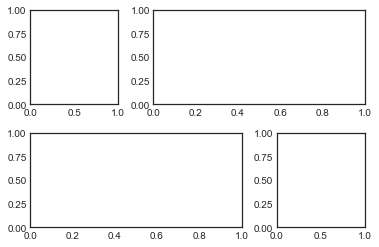

In [9]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

這種類型的柔性網格對齊具有廣泛的用途。
在創建多軸長條圖時使用，如下圖所示：

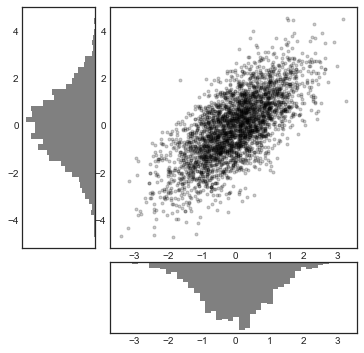

In [10]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()